# Data Fundamentals (H)
John H. Williamson -- Session 2020/2021

----

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**



---

## Assessed
# Introduction to probability


In [1]:
# Standard imports
# Make sure you run this cell!

from __future__ import print_function, division
import numpy as np  # NumPy
import scipy.stats 

from jhwutils.checkarr import array_hash, check_hash, check_scalar, check_string
import jhwutils.image_audio as ia
import jhwutils.tick as tick

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
print("Everything imported OK")
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)
np.random.seed(2019)
import lzma, base64
exec(lzma.decompress(base64.b64decode(b'/Td6WFoAAATm1rRGAgAhARYAAAB0L+Wj4AyQBO9dADSbSme4Ujxz95HdWLf4m39SX9b5yuqRd8UVk3DwULgMdEb8P1bLvis2Swz3hlDU+FwGvQQSXUZEv0GMy+ErARv0E4TRClh8sUl9ZbqguSgUNUmUKr4m3YFAWZjpTJGjeoNEEc2hIFQMgyP5EsFx5fVPHOdCs6Aio2vjJkNRzzD2rTKIdhEACsBvL3MiyFGsTPAbfZ3gyF3smzQcvg6RB7y4deWWa9ybUz1psfaazzMlPxu3lWaVFMzt8B58/pfBWncaFV6mhho1yiT+yRF/AC8O8HrBuDLHbbPyI67m3E1UlOrrBdbsQ+4Ycx8EockEJBoAQ/+fM5SyuP9eh4eFUvxZ0uGVSG8YIJe6JINUNFkSgz/hoPobDIy0Ea4GIYPWC/2q+GxEiy4P3mo9db0pf2sgFGeS0EqbM9T7RHiH8xDtKe/2xO1g01QHAqswmzBU5tK78QcKv2af2k2U5UHgJatna9gc/yK2FO5zFSOeltPqgI/SluHLdkQxafb5hmKEHcBWbNW5XU3340X65rSb9OpjhTDcE6CrK7VPNOQvMDh8xAuebP7xkTPVgP6PzkH0xr3HcLTzniPXBCru641w/vL0EK4NrXLPBw60ppIKz7cfY7Zh8x+KA1xiUgN0uHuKlkK9KKkP5iGg+gIDnhwjprXia02oymG1uX/2gGtYRcHsXUuDah+Sv+MZBK58TayiRl7S0bLBMqXN5yYb6Y7qEnqgUZk/c0dEVo+ke8BOopDGhCu7eIBE9k+3DFL+U37I+bTaejLlBnjChpBuFcuuSXRPTUWvVqSmgE6KTiXNrDGyw1LW9sAPRXuVmuZzZpHnH5i4LNeh9gzbzy7gE07t37tiBNW3EIrqHRzQd/fvb9Vm7hOEsbg3Ji010hQDYS9dMKqS0mFSM59SAwYGgA7O43YwQW8z+F7CCaPHj1+EnE+BntKPW5pG0IOPDOIXUglcBG+MR1opCpbW3cAmFbjZxBYs3Y+1dGYk9pJ4Rvy6ujrAy2e4wsG3QJJ6CsuVNQniENvF648QmN24fW/xXriFeoB/Nl8zCr9qrY+uiU8Af3c0LI1LUzu6TwXuu427er3gnqC0qFEmV3cH0Y47vkb4s8BJIgC9hn4hIxxYB4pIMFVs3ODY5P1d1L6AxJ5WqCOvajSLgGzEJA+8V8mjG17DuuVgRqhjOinEQ0p02DbBx8cl000DfNQrZp0zrtT0XW2CW/JPq76Hi3nGjYRtEB9CO9wW/hCujJ5/VvvBEqX5ce4hWMvH1/skPoWlajUCZ42OrvCOVnLA9j00p2rbh9KfJXtzfsrShtF5ZnWv7auXB4Nn/qSr+E9usTnZ6eSSOkzJIKib3AA1lTSYDvtGHUU6bLD6avMCqy2v1o5pudyha5wsmWka6td8r93dMq5uk1htAjjQkFBKdr7zsJCo9ijTqxL/9ymJvJpIEWXGm6utKtm7MyK4oKovATOJEUKpw02J3/Ik6/rAYhCjjV4RK9TA+NP6cC5u7lqG4i3xALdrg+LaJnrmE82qix42iUuQIIV+OUOpY4wVZuFNfpsyug9qIl1EnX7xLFkeIwvGUZFgLm2cQMPuv2/vTej6CVusY8odgXiVA+zP0sIurewC+B76AF4TaRhsmOz2nv98lAq8nF3WdlKkPijfxB3aj3puVkgAL0jU7xW3CPsS/2YFE1cdAAAAXHPSqeRprrcAAYsKkRkAAFk2meuxxGf7AgAAAAAEWVo=')).decode('ascii'))
 

Everything imported OK


C:\ProgramData\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."


## 1. Hunt the submarine: gridworld version

$$\newcommand{\vec}[1]{{\bf #1} } 
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}$$

The USS Scorpion has been lost at sea. Your job is to model where it might be probabilistically. 

<img src="imgs/scorpion.jpg" width="50%">

In part 1 of this lab, we will assume that our world is divided into a 2D grid of squares, each of which might contain an errant submarine.

<img src="imgs/sea_grid.png" width="50%">

### Random variables, outcomes and events

We assume that the submarine's location is given by a random variable $X$ whose sample space is the space of 2D grid points $\vec{x}=[x,y]$ where $x$ and $y$ are integers in the range 0-15 (inclusive). (Be careful: this `x,y` order is the opposite of the `row, column` format used in images).

You are given a probability mass function as a 16x16 matrix `submarine_pmf` giving the probability of each grid square, i.e $f_X(\vec{x}) = P(X=\vec{x})$. 


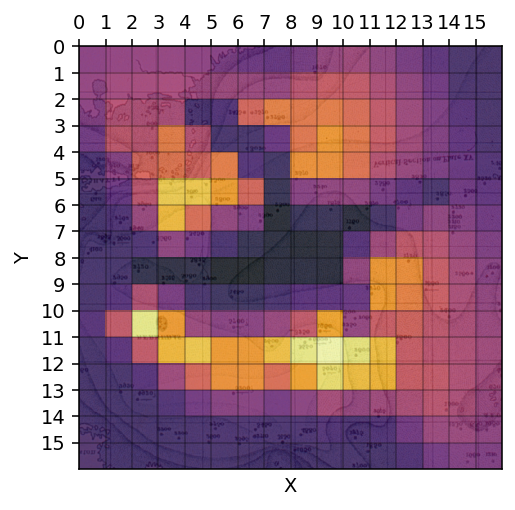

In [2]:
show_pmf(submarine_pmf) # show the PMF on top of a map

### Outcomes and events
Compute the the following probabilities of events. The notation [x1, y1] -> [x2, y2] indicates a box that should **include** `x1,y1,x2,y2` (be careful!).

* `in_1_4` probability submarine is in square [1,4]
* `out_3_3` probability submarine is *not* in square [3,3]
* `west_6` submarine is in square [x<=6, y]
* `y_div_3` submarine has a y coordinate exactly divisible by 3
* `below_above` submarine is in square [x, y<10] or [x, y>=13]
* `box_1` submarine is in the box [1, 4] -> [3, 9] (inclusive!)
* `box_2` submarine is in the box [0, 0] -> [15, 15] (inclusive!)
* `evens` submarine has x>=8 and an even y coordinate
* `odds_not_box` the *odds* that the submarine is *not* in the box [0, 5] -> [5,10]
* `odds_even` the *odds* that the submarine has an x coordinate which is even
* `logit_3_7` the log-odds (logits) that the submarine is in square [3, 7]
* `dlogit_box` the *change* in log-odds from the hypothesis that the submarine is in the box [0,5] -> [5, 10] to being in the box [1,1] -> [5,5]



In [3]:
pmf = submarine_pmf
# YOUR CODE HERE
in_1_4 = pmf[1,4]
out_3_3 = 1 - pmf[3,3]
west_6 = np.sum(pmf[:7])
y_div_3 = np.sum(pmf[:, ::3])
below_above = np.sum(pmf[:, :10]) + np.sum(pmf[:, 13:])
box_1 = np.sum(pmf[1:4, 4:10])
box_2 = 1
evens = np.sum(pmf[8:, ::2])

not_box = 1 - np.sum(pmf[0:6, 5:11])
odds_not_box = (1 - not_box) / not_box

even = np.sum(pmf[::2, :])
odds_even = (1 - even) / even

logit_3_7 = np.log(pmf[3,7] / (1 - pmf[3,7]))

box_1 = np.sum(pmf[0:6, 5:11])
logit_1 = np.log(box_1 / (1 - box_1))
box_2 = np.sum(pmf[1:6, 1:6])
logit_2 = np.log(box_2 / (1 - box_2))
dlogit_box = np.abs(logit_1 - logit_2)

In [4]:
with tick.marks(1):
    assert check_scalar(in_1_4, '0x5a04ecb8')

In [5]:
with tick.marks(1):
    assert check_scalar(out_3_3, '0x16885ca5')

In [6]:
with tick.marks(1):
    assert check_scalar(west_6, '0x12677960')

In [7]:
with tick.marks(1):
    assert check_scalar(y_div_3, '0x74cc8c76')

In [8]:
with tick.marks(1):
    assert check_scalar(below_above, '0x3e53104a')

In [9]:
with tick.marks(1):
    assert check_scalar(box_1, '0x715221c8')

AssertionError: 

In [10]:
with tick.marks(1):
    assert check_scalar(box_2, '0xb44c37ea')

AssertionError: 

In [11]:
with tick.marks(1):
    assert check_scalar(evens, '0xaaf59aba')

In [12]:
with tick.marks(1):
    assert check_scalar(odds_not_box, '0xfc69ede5')

In [13]:
with tick.marks(1):
    assert check_scalar(odds_even, '0xb10a08b0')

In [14]:
with tick.marks(1):
    assert check_scalar(logit_3_7, '0xae2b6ead')

In [15]:
with tick.marks(1):
    assert check_scalar(abs(dlogit_box), '0xc68850d9')

### Expected value
You need to plan for the search operation. There is a fixed search station at square x=6, y=6. Assume the Euclidean (L2) norm in measuring distances. The time in hours to search a grid square from the station is given by `time = distance**2 + 2*distance + 50`.  Compute:

* `expected_location` Expected value of the submarine location.
* `expected_distance` expected value of the distance of the submarine to this fixed station 
* `total_search_time` the **total** search time required to search the every square on the entire grid. Assume each search of a grid square has to restart from the station.
* `expected_search_time` expected search time of a random search starting at the station.

**REMEMBER**, in general $$E[f(X)] \neq f(E[X]).$$

In [ ]:
# Actually - time = distance**2 + 2*distance + 100

show_pmf(submarine_pmf)
plt.plot(6,6, 'C2o', label='Search station', markersize=10)
plt.legend(loc='lower left');

In [ ]:
# YOUR CODE HERE
locations = []
w_distances = []
times = []
w_times = []
for i in range(16):
    for j in range(16):
        locations.append(pmf[i,j] * np.array([i,j]))
        
        distance = np.linalg.norm(np.array([6,6]) - np.array([i,j]), 2)
        w_distance = distance * pmf[i,j]
        w_distances.append(w_distance)
        
        time = (distance ** 2) + (2 * distance) + 100
        times.append(time)
        
        w_time = time * pmf[i,j]
        w_times.append(w_time)

expected_location = np.sum(locations, axis=0)
expected_distance = np.sum(w_distances, axis=0)
total_search_time = np.sum(times, axis=0)
expected_search_time = np.sum(w_times, axis=0)

In [ ]:
with tick.marks(4):
    assert check_scalar(expected_location[0], '0x4385e7b6')
    assert check_scalar(expected_location[1], '0xdc5e96b6')

In [ ]:
with tick.marks(2):
    assert check_scalar(expected_distance, '0x5fc23b32')

In [ ]:
with tick.marks(2):
    assert check_scalar(total_search_time, '0xf799b5ab')

In [ ]:
with tick.marks(4):
    assert check_scalar(expected_search_time, '0xb130304')

### Conditional probability
The search strategy could be improved if one of the $x$ or $y$ coordinates were known for sure (e.g. from another source, like satellite imaging). To identify how *much* this would help, we can use conditional probability distributions. Compute the following:


* `p_x_y` the *conditional* PMF of an finding the submarine on an x coordinate given a y coordinate $P(X_x=x|X_y=y)$ as 16x16 matrix
* `p_y_x` the *conditional* PMF of finding the submarine on a y coordinate given an x coordinate $P(X_y=y|X_x=x)$ as 16x16 matrix
* `p_y_6` the conditional PMF of the submarine being in squares with y=6, as a single 16 element vector.
* `p_even_x` the PMF of the submarine being on a given y coordinate if we know the submarine is in a grid square with even x coordinate, as a single 16 element vector. $P(X_y=y|X_x = x, x\ \text{even})$
* `p_even_y_odd_x` the PMF of the submarine being on an even y coordinate if we know the submarine is in a grid square with odd x coordinate, as a single **8 element** vector. $P(X_y=y|X_x = x, y\ \text{even}, x\ \text{odd})$



In [ ]:
# YOUR CODE HERE
p_x_y = pmf / np.sum(pmf, axis=0)

In [ ]:
show_pmf(p_x_y, "P(x|y)")
with tick.marks(4):
    assert check_hash(p_x_y, ((16, 16), 2170.3143398663083))


In [ ]:
# YOUR CODE HERE
p_y_x = (pmf.T / np.sum(pmf, axis=1)).T

In [ ]:
show_pmf(p_y_x, "P(y|x)")
with tick.marks(4):
    assert check_hash(p_y_x, ((16, 16), 2054.2511170422736))

In [ ]:
# YOUR CODE HERE
p_y_6 = pmf[:, 6] / np.sum(pmf[:, 6], axis=0)

In [ ]:
show_pmf(p_y_6[:,None], 'p(x|y=6)')
with tick.marks(4):
    assert check_hash(p_y_6, ((16,), 8.042060988849471))

In [ ]:
# YOUR CODE HERE
p_even_x = np.sum(pmf[::2, :], axis=0)
p_even_x = p_even_x / np.sum(p_even_x)

In [ ]:
show_pmf(p_even_x[None,:], 'p(y|x even)')
with tick.marks(2):
    assert check_hash(p_even_x, ((16,), 8.583693375375438))

In [ ]:
# YOUR CODE HERE
p_even_y_odd_x = np.sum(pmf[1::2, ::2], axis=0)
p_even_y_odd_x = p_even_y_odd_x / np.sum(p_even_y_odd_x)

In [ ]:
_pmf = np.stack([p_even_y_odd_x, 0*p_even_y_odd_x]).T.reshape(16,)
show_pmf(_pmf[None,:], 'p(y even|x odd)')
with tick.marks(2):
    assert check_hash(p_even_y_odd_x, ((8,), 5.1303968119531635))

## Entropy
The search could be guided more intelligently if we could work out how informative getting one of the coordinates could be. For example, knowing which `x` coordinate would give you *most* information about the `y` coordinate?  Compute the entropy of each conditional distribution $H(Y|X=n)$ and store it in `entropy_x`. Use base 2 for the entropy (i.e. bits).
Store the most useful `x` coordinate to know in `most_informative_x`.


In [ ]:
# YOUR CODE HERE
entropy_x = np.zeros(16)
for i in range(16):
    p = pmf[i, :] / np.sum(pmf[i, :])
    entropy = np.sum(-p * np.log2(p))
    entropy_x[i] = entropy
    
most_informative_x = np.argmin(entropy_x)

In [ ]:
show_pmf(entropy_x[:, None])
with tick.marks(4):
    assert check_hash(entropy_x, ((16,), 529.9734236958207))

In [ ]:
with tick.marks(2):
    assert check_scalar(most_informative_x, '0x5cf9fda9')

## Sampling
We can use sampling to *simulate* where the submarine might lie on the sea floor. Write a function `sample_submarine(n)` which will randomly sample submarine locations according to `submarine_pmf`, returning a `nx2` array of sampled locations. Hint: there are 256 possible grid squares.

**Note: your code may pass these tests but still be incorrect; this will become apparent when you attempt the "reconstruct the PMF" part below.**

In [ ]:
# YOUR CODE HERE
def sample_submarine(n):
    pmf_arr = submarine_pmf.reshape((256))
      
    # cumulative mass function
    cmf = np.cumsum(list(pmf_arr))
    
    # generate n random values, between 0 and 1
    samples = np.random.uniform(0, 1, n)

    # code the values according to the bins
    res = np.zeros((n,2))
    i = 0
    for loc in np.digitize(samples, cmf):
        res[i] = [loc//16, loc%16]
        i += 1
    return res

In [ ]:
with tick.marks(4):    
    
    samples =  sample_submarine(3000)
    show_pmf(submarine_pmf)
    plt.gca().scatter(samples[:,0]+np.random.normal(0.5,0.2,len(samples)), samples[:,1]+np.random.normal(0.5,0.2,len(samples)), s=2, c='w')
    plt.gca().set_aspect(1.0)
    for n in [2, 4, 10, 1000, 5000]:
        samples =  sample_submarine(n)
        assert samples.shape == (n,2)
        assert np.sum(samples - np.floor(samples)) == 0.0
        mean = np.mean(samples, axis=0)
        sem = np.std(samples, axis=0)/np.sqrt(n)    
        assert np.all((mean-sem < [7.93, 5.67]) | ([7.93, 5.67] < mean+sem))


### Reconstruct the PMF

From samples, we can reconstruct an approximation of the PMF. Write a function `reconstruct_pmf(samples)` that will reconstruct the PMF using the empirical distribution from a set of samples and return the reconstructed PMF as a 16x16 matrix. 


In [ ]:
# YOUR CODE HERE
def reconstruct_pmf(samples):
    res = np.zeros((16,16))
    for row in range(16):
        for col in range(16):
            #res[row, col] = (samples[samples == [row, col]]).size / 256.0
            res[row, col] = np.count_nonzero(samples == [row, col]) / 16.0 / 2
    print(res)
    print(res.sum())
    return res

In [ ]:
def kl(a, b):
    return np.sum(np.where((b<1e-10)|(a<1e-10), 0.0, a * np.log(a/b)))

with tick.marks(4):    
    kls = [4.0, 3.5, 2.5, 0.1, 0.02]
    for i,n in enumerate([1, 4, 10, 1000, 5000]):        
        approx_pmf =  reconstruct_pmf(sample_submarine(n))
        assert approx_pmf.shape == submarine_pmf.shape
        assert check_scalar(np.sum(approx_pmf), "0xb44c37ea")     
        assert np.max(approx_pmf)<=1.0
        assert np.min(approx_pmf)>=0.0
        kl_div = abs(kls[i] - kl(approx_pmf, submarine_pmf))/kls[i]        
        assert kl_div < 1.0             
        sample = reconstruct_pmf(sample_submarine(n))
        show_pmf(sample, f"{n} samples")        

### Log likelihood
Various theoretical models of oceanographic features have been used to simulate what happened to the submarine. 

* crater
* zeeman_shift
* oblov_1
* minority
* inviscid

Each of these models produces a collection of simulated submarine locations as a result.

`submarine_samples` provides a dictionary with samples from various named submarine position generating functions. Compute the *log*-likelihood of each sequence $\log \mathcal{L}(x_1, x_2,\dots)$ under the model defined by the PMF `submarine_pmf`. 
* `sequence_lliks`  a dictionary that maps the names to the log-likelihood.
* `most_likely_sequence` the name of the sequence is most likely to be compatible with this model.


In [ ]:
print(submarine_samples.keys())

In [ ]:
# YOUR CODE HERE

In [ ]:
hashes = {
    "crater": "0xcb5485c3",
    "zeeman_shift": "0x8be32607",
    "oblov_1": "0xe1c9cecf",
    "minority": "0x2d4db9e5",
    "inviscid": "0x8b656b5d",
}

with tick.marks(4):
    for key in submarine_samples.keys():
        print(key, sequence_lliks[key])
        assert check_scalar(sequence_lliks[key], hashes[key])

In [ ]:
with tick.marks(1):    
    assert check_string(most_likely_sequence, '0x57f0dda0')

### Bayes' rule

The function `search_submarine(x,y)` returns the **likelihood** for the submarine's location, given an `x` and `y` coordinate to search at based on sonar returns from a search ship. It returns this as a 16x16 matrix.

* `submarine_posterior` Using `submarine_pmf` as a prior, compute the posterior PMF using the result of `search_submarine(10, 7)` as likelihood. 

In [ ]:
# YOUR CODE HERE

In [ ]:

show_pmf(submarine_pmf, 'Prior')
show_pmf(search_submarine(10,7), 'Likelihood' )
show_pmf(submarine_posterior, 'Posterior')
with tick.marks(4):
    assert check_hash(submarine_posterior, ((16, 16), 152.4120441148023))

 ### Sequential searching
Compute the posterior distribution after searching the each of squares y=8, x=0..15 (i.e. testing *each* of these 16 squares in turn, using the posterior from step as the prior to the next), storing the posteriors as a list, *starting with the prior* and ending with the posterior after observing y=8, x=15. You should have a 17 element list of 16x16 matrices. Store this as `search_strip_posterior`

In [ ]:
# YOUR CODE HERE

In [ ]:

for i, p in enumerate(search_strip_posterior):
    show_pmf(p, f'Posterior after searching y=8, x={i}')
with tick.marks(4):
    assert check_hash(search_strip_posterior, ((17, 16, 16), 37562.991353664205))

### Intelligent searching

Modify your code above, to instead of searching blindly along a strip, to search starting at the square with the highest posterior probability in the previous round. In the first round, use the prior. Store the *sequence of grid squares you searched in the list `bayesian_search`*. Run the search for five steps, and show the posterior PMFs as you search.

Which search procedure would you prefer if you were trapped in a sunken submarine?

In [ ]:
# YOUR CODE HERE

In [ ]:
with tick.marks(4):
    assert check_hash(np.array(bayesian_search, dtype=np.float64), ((5, 2), 446.77211421989836))

## 2. Hunt the submarine: continuous version
The simple discrete grid model is easy to do computations with but not a very realistic model. A better world model is that locations are *continuous* in nature; for example points specified as longitude and latitude. To work with this model probabilistically, we need to use (multivariate, i.e. vector) **probability density functions** which map coordinates to *density*, not probability.


### Continuous distributions
A continuous random variable can be represented as a class that has a set of parameters and that provides two functions:

* `llik` the log-likelihood of an observation 
* `sample` that returns a random sample from a distribution

It's also useful to have a way of drawing the density for debugging.

*You will need to use this class to solve the problems below*

In [ ]:
import scipy.stats
from jhwutils.ellipse import _cov_ellipse

class MultivariateNormal:
    
    def __init__(self, mu, sigma):
        # use the existing implementation in scipy.stats
        self.mu = mu
        self.sigma = sigma
        self.distribution = scipy.stats.multivariate_normal(self.mu, self.sigma)
    
    # log-likelihood of one observation
    def llik(self, x):
        return self.distribution.logpdf(x)
    
    # n random samples
    def sample(self, n):
        return self.distribution.rvs(n)        
        
    # render the distribution pdf as if it were a PMF
    def draw(self):            
        span = np.linspace(0,16,160)
        grid = np.array(np.meshgrid(span, span)).reshape(2, -1).T        
        pdf = self.distribution.pdf(grid)
        show_pmf(pdf.reshape(160,160).T)
        
        
# construct a new instance
x = MultivariateNormal(mu=(14,4), sigma=np.eye(2))        
x.draw()

### A. Fitting with direct computation

There are a collection of *observed* potential locations for the submarine from a search ship in `submarine_observations`. The problem is to fit the parameters of a PDF given these observations.


#### A.1 Estimation
Under the assumption that a reasonable model for the submarine location is a multivariate normal, compute the following values:

* directly fit parameters for a `MultivariateNormal` using standard numpy functions and store the result in `normal_mu` and `normal_sigma`.
* `llik_normal` the log-likelihood of the *entire* set of observations under this model (i.e. with these parameters)
* `samples_normal` 250 samples drawn from the multivariate normal model with these parameters
* `llik_misfit` how much smaller the log-likelihood of observations is compared to the samples *generated under the model* (i.e. `samples_normal`). This should be a negative number.

In [ ]:
submarine_observations = np.loadtxt('data/submarine.txt')

In [16]:
np.random.seed(2019)
# YOUR CODE HERE
normal_mu = np.mean(submarine_observations, axis=0)
normal_sigma = np.cov(submarine_observations, rowvar=False)
submarine_model = MultivariateNormal(mu=normal_mu, sigma=normal_sigma)
samples_normal = submarine_model.sample(250)
llik_normal = submarine_model.llik(samples_normal)

NameError: name 'submarine_observations' is not defined

In [17]:
x = MultivariateNormal(normal_mu, normal_sigma)

x.draw()
ax = plt.gca()
ax.scatter(samples_normal[:,0], samples_normal[:,1], c='r', marker='x', s=1, label="Samples")
ax.scatter(submarine_observations[:,0], submarine_observations[:,1], marker='o', color='w', s=2, label="Observations")
ax.set_xlim(0,16)
ax.set_ylim(0,16)
ax.legend()
ax.set_title(f"Log-likelihood = {llik_normal:.2f}")

NameError: name 'MultivariateNormal' is not defined

In [ ]:
with tick.marks(4):
    assert check_hash(normal_mu, ((2,), 78.24708797223835))
    assert check_hash(normal_sigma, ((2,2), 30.158815848656694))
    

In [ ]:
with tick.marks(2):
    assert samples_normal.shape == (250, 2)
    assert np.all(np.std(samples_normal, axis=0)>0.5)
    assert np.all(np.mean(samples_normal, axis=0) - np.array([13, 9]) < 4.0 * (np.std(samples_normal, axis=0)/np.sqrt(250)))
    

In [ ]:
with tick.marks(1):
    assert check_scalar(llik_normal, '0xd33a3dae')


In [ ]:
with tick.marks(1):
    assert check_scalar(llik_misfit, '0xf19b5a76', tol=1)

### B: A cross search pattern

Scientists argue that a better model for the location of the submarine is a cross-shaped density that reflects two possible ocean currents in the Atlantic and is also easier to search by ship. The scientists have written a probabilistic model which gives the density of a specialised "cross distribution". This is a non-standard distribution that has four parameters: `ctr`, `span`, `leg` and `angle`.

<img src="imgs/ship_cross.png" width="50%">



In [ ]:
class CrossDistribution:
    def __init__(self, ctr, span, leg, angle):
        # you do not need to understand this code
        # to be able to use this class        
        self.ctr = ctr
        leg = 1.0 + np.log(leg + 1.0)
        s, c = np.sin(np.radians(angle)), np.cos(np.radians(angle))
        r1 = np.array([[s / leg, c * leg], [c / leg, -s * leg]])
        r2 = np.array([[-c / leg, s * leg], [s / leg, c * leg]])
        scale = np.eye(2) * np.sqrt(span)
        self.arm1 = scipy.stats.multivariate_normal(self.ctr, r1 @ scale @ scale @ r1.T)
        self.arm2 = scipy.stats.multivariate_normal(self.ctr, r2 @ scale @ scale @ r2.T)

    # log-likelihood of one observation
    def llik(self, x):
        return np.log((self.arm1.pdf(x) + self.arm2.pdf(x)) / 2.0)

    # n random samples
    def sample(self, n):
        a1_samples = self.arm1.rvs(n)
        a2_samples = self.arm2.rvs(n)
        return np.where(np.random.uniform(0, 1, n) < 0.5, a1_samples.T, a2_samples.T).T

    # render the distribution pdf as if it were a PMF
    def draw(self):
        span = np.linspace(0, 16, 160)
        grid = np.array(np.meshgrid(span, span)).reshape(2, -1).T

        pdf = 0.5 * self.arm1.pdf(grid) + 0.5 * self.arm2.pdf(grid)
        show_pmf(pdf.reshape(160, 160).T)

**Try varying these parameters and viewing the resulting distributions to understand what effect they have:**

In [ ]:
cf = CrossDistribution(ctr=(5,5), span=1, leg=3.0, angle=25.)

cf.draw()


## Expectation

We would like to be able to compute the expected location (and search time/distance) for this model. But we can't do a simple operation with a PDF like we could with the PMF model. Instead, we can use sampling methods to approximate the expectation $\hat{\mathbb{E}}[f(X)]$.

Using the formula `time = distance**2 + 2*distance + 100`, use the Monte Carlo approximation to the expectation, with 1000 samples, to compute:

* `cross_expected_location` the expected location  (a 2D vector)
* `cross_expected_distance` expected L2 distance from the fixed station at (14,2) 
* `cross_expected_time`  expected search time in hours from this station.

with a cross distribution having the parameters:
    
        ctr = (6,10)
        span = 0.5
        leg = 8.0
        angle = 45.0

**NB: Set a fixed random seed at the start of the cell with `np.random.seed()` to guarantee reproducibility!**


In [ ]:
np.random.seed(2019)

# YOUR CODE HERE

In [ ]:
print(cross_expected_location)
print(cross_expected_distance)
print(cross_expected_time)

In [ ]:
with tick.marks(2):
    assert check_scalar(np.sum(cross_expected_location), '0x36c7c001', tol=1)
    
    

In [ ]:
with tick.marks(2):
    assert check_scalar(cross_expected_distance, '0x84e71c11', tol=1)
    

In [ ]:
with tick.marks(3):   
    assert check_scalar(cross_expected_time, '0xd986f1f6', tol=1)

### C. Fitting with MLE
There is no direct form to compute the parameters  `ctr`, `span`, `leg` and `angle` from `submarine_observations` in the way we could for the simple normal distribution. 

Using stochastic hill-climbing (copy your code from the optimisation lab) and the idea of **maximum likelihood**, optimise to find the best parameter settings `theta= [ctr_x, ctr_y, span, leg, angle]` given these observations. 

Assume that the following constraints must be applied in the optimisation:

* `ctr` must be a vector in [0,0] to [16,16], 
* `span` must be a scalar in range 0.0 to 20.0
* `leg` must be a scalar from 0.0 to 10.0
* `angle` must be a scalar from 0.0 to 90.0

find a best-fit estimate for `theta`. You should be able to find a good fit within 10,000 iterations. You will need to modify the stochastic hill climbing code to enforce these constraints (hint: you can use `np.clip` for this).

In [ ]:
np.random.seed(2019)
# YOUR CODE HERE

In [ ]:
cf = CrossDistribution(ctr=(theta[0],theta[1]), span=theta[2], leg=theta[3], angle=theta[4])
cf.draw()
ax = plt.gca()
ax.scatter(submarine_observations[:,0], submarine_observations[:,1], marker='o', color='w', s=2, label="Observations")
ax.set_xlim(0,16)
ax.set_ylim(0,16)

In [ ]:
with tick.marks(10):
    np.random.seed(2019)
    test_pts = np.random.uniform(0,50,(5,5)) 
    witnesses = np.linalg.norm(test_pts - theta, axis=1, ord=2)
    distance = np.linalg.norm(witnesses - np.array([54.4, 75.2, 66.3, 47.52, 56.12]))    
    assert distance < 1

-----

# Submission instructions

## Before submission

* Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`.
* SAVE THE NOTEBOOK





<div class="alert alert-block alert-danger">
    
### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `<xxx>.ipynb`.

</div>


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Plagiarism will be subject to the Plagiarism Policy. The penalties are severe.